In [1]:
### Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Set record count and set count to store the cities in different sets with 50 records each set
#record_counter=0
#set_counter = 1
# Find url info on open weather API website
#base_url = 'http://api.openweathermap.org/data/2.5/weather?'
#Set units for Fahrenheit
#units = 'imperial'
#Creat url for each different city
#query_url = f'{base_url}appid={weather_api_key}&units={units}&q='
#print('Beginning Data Retrieval')
#print('------------------------')
# Start a for loop to look through all the cities
#for city in cities:
    #response = requests.get(query_url+city).json()
    #if record_counter < 50:
        #record_counter += 1
    #else:
        #set_counter += 1
        #record_counter = 1
    #print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    #try:
        #cloudiness.append(response['clouds']['all'])
        #country.append(response['sys']['country'])
        #date.append(response['dt'])
        #humidity.append(response['main']['humidity'])
        #temp.append(response['main']['temp_max'])
        #lat.append(response['coord']['lat'])
        #lng.append(response['coord']['lon'])
        #wind.append(response['wind']['speed'])
        #new_cities.append(city)
    #except:
        #print("City not found. Skipping...")
        #pass
#print('-------------------------')
#print('Data Retrieval Complete')
#print('-------------------------')

#Set the lists to hold the values for the requested info
#new_cities = []
#cloudiness = []
#country = []
#date = []
#humidity = []
#temp = []
#lat = []
#lng = []
#wind = []

In [3]:
# List for holding coordinates, city, and country
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

594
594


In [4]:
#base url
url = 'http://api.openweathermap.org/data/2.5/weather?'
#set units to pull data
units = 'imperial'
#build partial query url
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [6]:
#set up lists to hold response info
city_name = []
city_id = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

#set counter to store records
record_counter = 0
set_counter = 1

print('Beginning Data Retrieval')
print('------------------------')

#loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 1
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    try:
        city_name.append(response['name'])
        city_id.append(response['id'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except:
        print('City not found. Skipping...')
        pass
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

        
#print the length of each to to ensure they all have the same number of values
#print(len(city_name))
#print(len(city_id))
#print(len(lat))
#print(len(lng))
#print(len(temp))
#print(len(humidity))
#print(len(cloudiness))
#print(len(wind_speed))

Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | hobart
Processing record 2 of set 1 | northam
Processing record 3 of set 1 | umm lajj
Processing record 4 of set 1 | cape town
Processing record 5 of set 1 | ushuaia
Processing record 6 of set 1 | faanui
Processing record 7 of set 1 | punta arenas
Processing record 8 of set 1 | port augusta
Processing record 9 of set 1 | taolanaro
City not found. Skipping...
Processing record 10 of set 1 | hermanus
Processing record 11 of set 1 | lebu
Processing record 12 of set 1 | rikitea
Processing record 13 of set 1 | pevek
Processing record 14 of set 1 | fairbanks
Processing record 15 of set 1 | butaritari
Processing record 16 of set 1 | kenai
Processing record 17 of set 1 | jamestown
Processing record 18 of set 1 | iquique
Processing record 19 of set 1 | cherskiy
Processing record 20 of set 1 | saint-philippe
Processing record 21 of set 1 | husavik
Processing record 22 of set 1 | east london
Processing record 23 of s

Processing record 43 of set 4 | nome
Processing record 44 of set 4 | fortuna
Processing record 45 of set 4 | barentsburg
City not found. Skipping...
Processing record 46 of set 4 | biskupiec
Processing record 47 of set 4 | santa maria
Processing record 48 of set 4 | ajdabiya
Processing record 49 of set 4 | beyla
Processing record 50 of set 4 | victoria
Processing record 1 of set 5 | mtimbira
Processing record 2 of set 5 | murmansk
Processing record 3 of set 5 | san-pedro
Processing record 4 of set 5 | belushya guba
City not found. Skipping...
Processing record 5 of set 5 | sitka
Processing record 6 of set 5 | igunga
Processing record 7 of set 5 | kurilsk
Processing record 8 of set 5 | aktash
Processing record 9 of set 5 | baboua
City not found. Skipping...
Processing record 10 of set 5 | antofagasta
Processing record 11 of set 5 | carutapera
Processing record 12 of set 5 | jumla
Processing record 13 of set 5 | talnakh
Processing record 14 of set 5 | provideniya
Processing record 15 of 

Processing record 30 of set 8 | necochea
Processing record 31 of set 8 | dhuri
Processing record 32 of set 8 | usinsk
Processing record 33 of set 8 | alot
Processing record 34 of set 8 | sinkat
City not found. Skipping...
Processing record 35 of set 8 | hirara
Processing record 36 of set 8 | amahai
Processing record 37 of set 8 | lumberton
Processing record 38 of set 8 | toba
Processing record 39 of set 8 | bereda
Processing record 40 of set 8 | port-cartier
Processing record 41 of set 8 | san antonio
Processing record 42 of set 8 | nizhneyansk
City not found. Skipping...
Processing record 43 of set 8 | yokadouma
Processing record 44 of set 8 | tautira
Processing record 45 of set 8 | mana
Processing record 46 of set 8 | pozo colorado
Processing record 47 of set 8 | cascais
Processing record 48 of set 8 | soe
Processing record 49 of set 8 | terrace bay
Processing record 50 of set 8 | ahtopol
Processing record 1 of set 9 | koson
Processing record 2 of set 9 | yarim
Processing record 3 of

Processing record 22 of set 12 | amarante do maranhao
Processing record 23 of set 12 | pakxan
Processing record 24 of set 12 | birin
Processing record 25 of set 12 | eureka
Processing record 26 of set 12 | vila franca do campo
Processing record 27 of set 12 | sakaiminato
Processing record 28 of set 12 | tabou
Processing record 29 of set 12 | nizhneivkino
Processing record 30 of set 12 | kulhudhuffushi
Processing record 31 of set 12 | bhindar
Processing record 32 of set 12 | conceicao da barra
Processing record 33 of set 12 | salalah
Processing record 34 of set 12 | tizapan el alto
Processing record 35 of set 12 | srandakan
Processing record 36 of set 12 | ugoofaaru
Processing record 37 of set 12 | sao felix do xingu
Processing record 38 of set 12 | cabo san lucas
Processing record 39 of set 12 | verkh-usugli
Processing record 40 of set 12 | maracacume
Processing record 41 of set 12 | toyooka
Processing record 42 of set 12 | dingle
Processing record 43 of set 12 | goderich
Processing re

In [8]:
#create dataframe from the data pulled above
weather_dict = {
    'city': city_name,
    'id': city_id,
    'lat': lat,
    'lng': lng,
    'temp': temp,
    'humidity': humidity,
    'clouds': cloudiness,
    'wind_speed': wind_speed
}    
weather_data = pd.DataFrame(weather_dict)
weather_data.info

<bound method DataFrame.info of            city       id    lat     lng   temp  humidity  clouds  wind_speed
0        Hobart  2163355 -42.88  147.33  66.31        37      70       18.34
1       Northam  2641434  51.03   -4.22  40.78       100      75        4.70
2      Umm Lajj   100926  25.02   37.27  57.65        43       0        7.40
3     Cape Town  3369157 -33.93   18.42  73.65        53       0        6.93
4       Ushuaia  3833367 -54.80  -68.30  42.80        75      20        9.17
..          ...      ...    ...     ...    ...       ...     ...         ...
548  Maracacume  3395497  -2.04  -45.96  73.31        98     100        1.77
549     Toyooka  1849831  35.53  134.83  47.97       100      75        6.93
550      Dingle  1714733  11.00  122.67  81.91        79      35       11.74
551    Goderich  5962442  43.75  -81.72  33.03        93      61        1.01
552      Nacala  1035025 -14.54   40.67  78.78        79     100        8.10

[553 rows x 8 columns]>

In [9]:
#pull individual column data for scatter plots
lat_values = weather_data['lat']
temp_values = weather_data['temp']
humidity_values = weather_data['humidity']
clouds_values = weather_data['clouds']
wind_speed_values = weather_data['wind_speed']

# Scatter Plots

The r-squared is: -0.7989684617661358


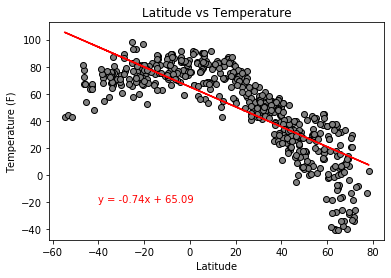

In [26]:
#latitude vs temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, temp_values)
regress_values = lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(lat_values, temp_values, marker='o', facecolors='grey', edgecolors='black')
plt.plot(lat_values, regress_values, 'r-')
plt.annotate(line_eq,(-40,-20), fontsize=10, color='red')
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/lat_temp_plt.png')

The r-squared is: 0.17789717339321534


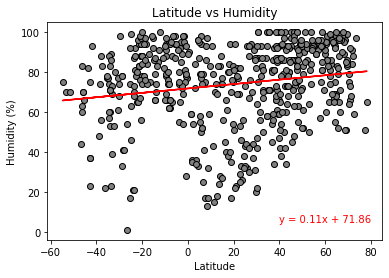

In [28]:
#latitude vs humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, humidity_values)
regress_values = lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(lat_values, humidity_values, marker='o', facecolors='grey', edgecolors='black')
plt.plot(lat_values, regress_values, 'r-')
plt.annotate(line_eq,(40,5), fontsize=10, color='red')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/lat_hum_plt.png')

The r-squared is: 0.09820673755392487


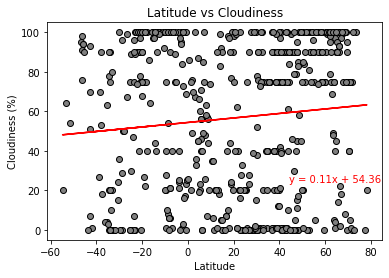

In [32]:
#latitude vs cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, clouds_values)
regress_values = lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(lat_values, clouds_values, marker='o', facecolors='grey', edgecolors='black')
plt.plot(lat_values, regress_values, 'r-')
plt.annotate(line_eq,(44,24), fontsize=10, color='red')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/lat_cloud_plt.png')

The r-squared is: 0.021503034165580342


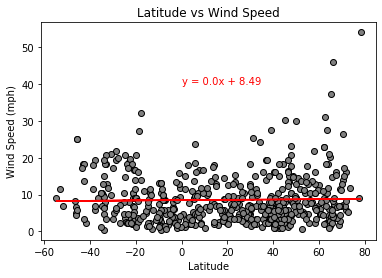

In [33]:
#latitude vs wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, wind_speed_values)
regress_values = lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(lat_values, wind_speed_values, marker='o', facecolors='grey', edgecolors='black')
plt.plot(lat_values, regress_values, 'r-')
plt.annotate(line_eq,(0,40), fontsize=10, color='red')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/lat_wind_plt.png')

# Hemisphere Scatter Plots

In [14]:
#locate the data with a latitude value equal to or greater than 0 for northern hemisphere
north_hem = weather_data.loc[weather_data['lat'] >= 0]
#locate the data with a latitude value less than 0 for southern hemisphere
south_hem = weather_data.loc[weather_data['lat'] < 0]

In [15]:
#pull individual column data for scatter plots based on hemisphere
north_temp = north_hem['temp']
south_temp = south_hem['temp']
north_lat = north_hem['lat']
south_lat = south_hem['lat']
north_humid = north_hem['humidity']
south_humid = south_hem['humidity']
north_clouds = north_hem['clouds']
south_clouds = south_hem['clouds']
north_wind = north_hem['wind_speed']
south_wind = south_hem['wind_speed']

The r-squared is: -0.8690710243766977


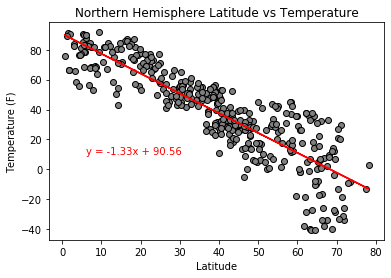

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_temp, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(6,10), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/01_north_lat_temp.png')

The r-squared is: 0.47172452107179075


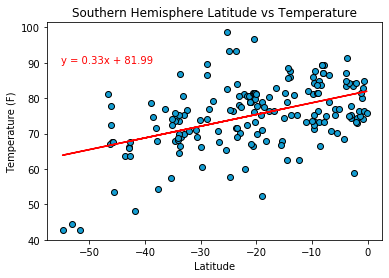

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_temp, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,90), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/01_south_lat_temp.png')

The r-squared is: 0.3930870430584619


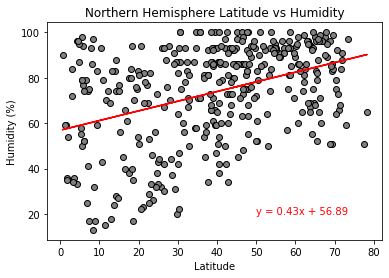

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_humid, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(50,20), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/02_north_lat_humid.png')

The r-squared is: 0.3311624572650152


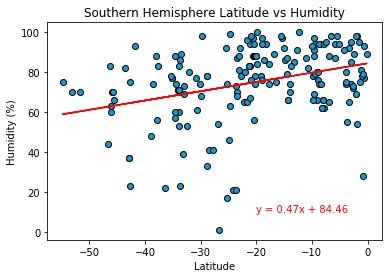

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_humid, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-20,10), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/02_south_lat_humid.png')

The r-squared is: 0.2640031301977231


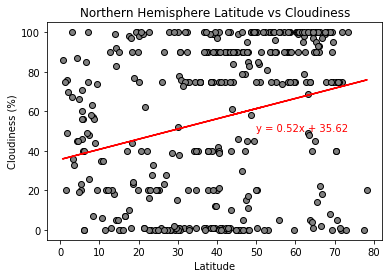

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_clouds)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_clouds, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(50,50), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/03_north_lat_cloud.png')

The r-squared is: 0.12508361560988518


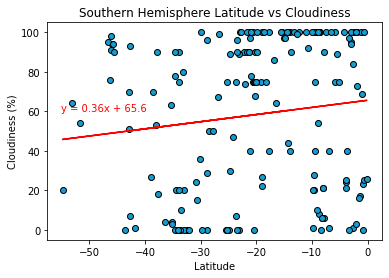

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_clouds)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_clouds, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,60), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/03_south_lat_cloud.png')

The r-squared is: 0.17230869377002747


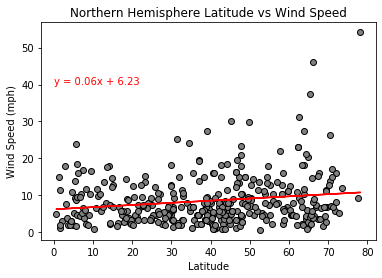

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_wind, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(0,40), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/04_north_lat_wind.png')

The r-squared is: -0.33517972973270777


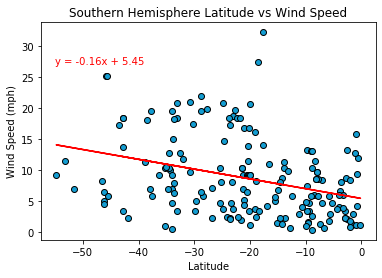

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_wind, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,27), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/04_south_lat_wind.png')